In [54]:
%pylab qt
%matplotlib inline
import scipy.constants as cst

Populating the interactive namespace from numpy and matplotlib


# Rayleigh, Investigations in capillarity (1899)

Dans le texte, ce qu'il appelle densité est
$$density = \frac{1}{length\ in\ cm} \times 100$$
où $length\ in\ cm$ est la longueur de la cuve donnant l'aire de la surface d'eau (la largeur du plat est 10 cm dans l'expérience).

La masse en gramme $mass$ est la masse dans la balance de Wilhelmy, liée à la valeur de la tension de surface de l'eau par :
$$ 2l\alpha = mg$$
où $l=27\,\rm cm$ (la longueur équivalente des 3 lames du dispositif expérimental de Rayleigh), $g$ l'accélération de pesanteur et $\alpha$ la tension superficielle eau/air ($72{,}8\,\rm mN/m$ actuellement, 74 selon Rayleigh)


In [27]:
alpha0 = 72.8e-3
alpha_article = 74e-3
g      = 9.81
l      = 27e-2
width  = 10e-3

2*l*alpha_article/g #ok ça colle avec les valeur de l'article

0.004073394495412844

<ipython-input-34-34a600c11df6>:11: RuntimeWarning: divide by zero encountered in true_divide
  surface3 = 1/density3 * width
<ipython-input-34-34a600c11df6>:16: RuntimeWarning: divide by zero encountered in true_divide
  surface4 = 1/density4 * width


Text(0, 0.5, 'Surface tension (a.u.)')

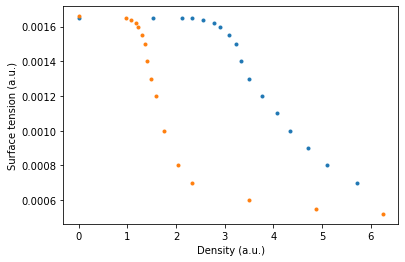

In [34]:
### les figure de l'article de Rayleigh

alpha0 = 72.8e-3
g      = 9.81
l      = 27e-2
width  = 10e-3

### Fig 3 de l'article
density3 = np.array([0, 152, 213, 233, 256, 278, 290, 308, 323, 334, 351, 377, 408, 435, 472, 510, 571])
mass3    = np.array([1.65, 1.65, 1.65, 1.65, 1.64, 1.62, 1.6, 1.55, 1.5, 1.4, 1.3, 1.2, 1.1, 1., .9, .8, .7])*1e-3
surface3 = 1/density3 * width

### Fig 4 de l'article, réalisée après la première en ajoutant d'avantage d'huile
density4 = np.array([0, 98, 108, 117, 122, 130, 136, 141, 148, 159, 175, 204, 233, 351, 488, 625])
mass4    = np.array([1.66, 1.65, 1.64, 1.62, 1.6, 1.55, 1.5, 1.4, 1.3, 1.2, 1., .8, .7, .6, .55, .52])*1e-3
surface4 = 1/density4 * width

plt.plot(density3*1e-2, mass3, ".")
plt.plot(density4*1e-2, mass4, ".")
plt.xlabel(r"Density (a.u.)")
plt.ylabel("Surface tension (a.u.)")

Text(0, 0.5, 'Surface tension (N/m)')

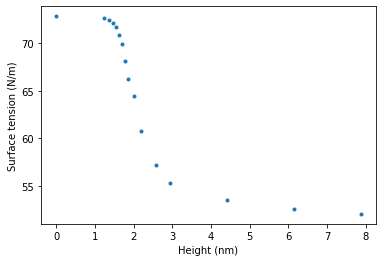

In [53]:
### curve from The constitution and fundamental properties of solids and liquids. II. Liquids, Langmuir, 1917
### I don't have the same y value, not sure how they did in Langmuir

def surfacetension(mass):
    ### compute the surface tension value in N/m from mass value from Rayleigh's article
    ### just need to add an offset so that the mass value at zero density is the same for pure water
    m0 = 2*l*alpha0/g
    offset = m0 - mass.max()
    offset_mass = offset + mass
    alpha = offset_mass*g/2./l
    return alpha

def height(density, mass):
    ### compute height of a continuous layer with respect to density
    alpha = surfacetension(mass)
    for a, d in zip(alpha, density):
        if a > alpha0*0.9:
            pass
        else:
            break
    return 2*density/d

plt.plot(height(density4, mass4), surfacetension(mass4)*1000, '.')

plt.xlabel("Height (nm)")
plt.ylabel("Surface tension (N/m)")

Text(0, 0.5, 'Surface tension (a.u.)')

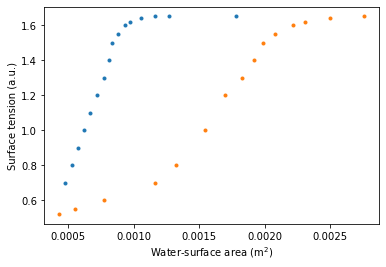

In [21]:
### je trouve les figures plus facilement interprétable en mettant en abscice l'aire de la surface d'eau.

plt.plot(surface3, mass3, ".")
plt.plot(surface4, mass4, ".")
plt.xlabel(r"Water-surface area ($\rm m^2$)")
plt.ylabel("Surface tension (a.u.)")

# Estimation du diamètre de la trioléine

In [58]:
M   = 885.4321 # masse molaire de la trioléine en g/mol Wikipédia
rho = 0.916    # masse volumique de l'huile d'olive en kg/L
(1/(rho*1e3/(M*1e-3/cst.N_A)))**(1/3)

1.1708545883291737e-09

# Volume d'une goutte

https://www.nisbets.fr/bac-gastronorme-inox-20mm-vogue/k998

In [64]:
def volume(diameter):
    radius = diameter/2
    return 4/3 * np.pi * radius**3

volume(1e-3)/1.1e-9

0.47599888690754444

In [62]:
### Surface d'un bac en inox de cantine
0.325*0.53

0.17225000000000001